# Feature Selection

### Import Libraries

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, chi2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import f_classif, chi2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier, LassoCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
%matplotlib inline

### Load train and test dataset

In [6]:
training = pd.read_csv("training.csv",sep=";")
test= pd.read_csv("test.csv",sep=";")


# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
training[' workclass']= label_encoder.fit_transform(training[' workclass'])
training[' education']= label_encoder.fit_transform(training[' education'])
training[' marital-status']= label_encoder.fit_transform(training[' marital-status'])
training[' occupation']= label_encoder.fit_transform(training[' occupation'])
training[' relationship']= label_encoder.fit_transform(training[' relationship'])
training[' race']= label_encoder.fit_transform(training[' race'])
training[' sex']= label_encoder.fit_transform(training[' sex'])
training[' native-country']= label_encoder.fit_transform(training[' native-country'])
training[' salary-classification']= label_encoder.fit_transform(training[' salary-classification'])

#test

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
test[' workclass']= label_encoder.fit_transform(test[' workclass'])
test[' education']= label_encoder.fit_transform(test[' education'])
test[' marital-status']= label_encoder.fit_transform(test[' marital-status'])
test[' occupation']= label_encoder.fit_transform(test[' occupation'])
test[' relationship']= label_encoder.fit_transform(test[' relationship'])
test[' race']= label_encoder.fit_transform(test[' race'])
test[' sex']= label_encoder.fit_transform(test[' sex'])
test[' native-country']= label_encoder.fit_transform(test[' native-country'])
test[' salary-classification']= label_encoder.fit_transform(test[' salary-classification'])



data = training[['age', ' workclass', ' fnlwgt', ' education', ' education-num', ' marital-status', ' occupation', 
             ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
target = training[' salary-classification']


data_test = test[['age', ' workclass', ' fnlwgt', ' education', ' education-num', ' marital-status', ' occupation', 
             ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
target_test = test[' salary-classification']


In [7]:
def standardScaling2(X_train, X_test): 
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform( X_train )
    scaled_test = scaler.transform( X_test )
    return scaled_data, scaled_test;

def tomekSampler(X_train, y_train):
    cc = TomekLinks(sampling_strategy='majority')
    X_balanced, y_train = cc.fit_sample(X_train, y_train)
    X_balanced, y_train = shuffle(X_balanced, y_train)
    return X_balanced, y_train;

## Choosing a K value

In [21]:
kbest_svc_accuracy = []
kbest_knn_accuracy = []
kbest_logreg_accuracy = []

for i in range(1,14):
    
    X_train_transformed, X_test_transformed = standardScaling2(data, data_test)
    X_train_balanced, y_train_balanced = tomekSampler(X_train_transformed, target)
    
    selectKBest = SelectKBest(f_classif, k=i)
    selectKBest.fit(X_train_balanced,y_train_balanced)
    X_train_selected = selectKBest.transform(X_train_balanced)
    X_test_selected = selectKBest.transform(X_test_transformed)
    
    svc = SVC().fit(X_train_selected, y_train_balanced)
    pred_i_svc_kbest = svc.predict(X_test_selected)
    pred_i_svc_kbest_accuracy = accuracy_score(target_test, pred_i_svc_kbest)
    kbest_svc_accuracy.append(pred_i_svc_kbest_accuracy)

    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_selected, y_train_balanced)
    pred_i_knn_kbest = knn.predict(X_test_selected)
    pred_i_knn_kbest_accuracy = accuracy_score(target_test, pred_i_knn_kbest)
    kbest_knn_accuracy.append(pred_i_knn_kbest_accuracy)

    logreg = LogisticRegression(max_iter=10000).fit(X_train_selected, y_train_balanced)
    pred_i_logreg_kbest = logreg.predict(X_test_selected)
    pred_i_logreg_kbest_accuracy = accuracy_score(target_test, pred_i_logreg_kbest)
    kbest_logreg_accuracy.append(pred_i_logreg_kbest_accuracy)

Text(0, 0.5, 'Accuracy')

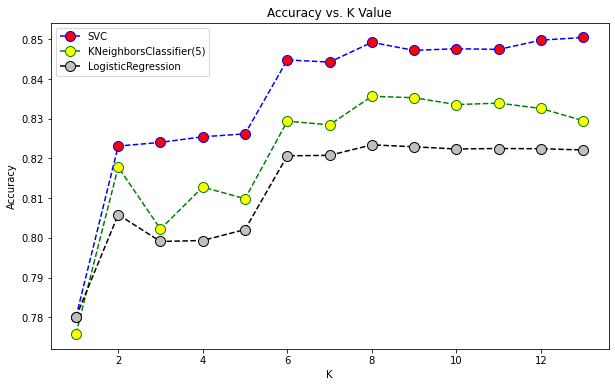

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,14),kbest_svc_accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label='SVC')
plt.plot(range(1,14),kbest_knn_accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10, label='KNeighborsClassifier(5)')
plt.plot(range(1,14),kbest_logreg_accuracy, color='black', linestyle='dashed', marker='o',
         markerfacecolor='silver', markersize=10, label='LogisticRegression')
plt.legend()
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Filter methods

### SelectKBest

In [23]:
#selectkbest
selector = SelectKBest(chi2, k=8) #testar de 1 a 14
fit = selector.fit(data, target)
#features selection
cols = selector.get_support(indices=True)
cols_names = list(data.columns[cols])
selector.get_support(indices=True)
fit.scores_

array([8.60061182e+03, 4.75081192e+01, 1.71147683e+05, 2.97942270e+02,
       2.40142178e+03, 1.12346982e+03, 5.04558854e+02, 3.65914312e+03,
       3.30313051e+01, 5.02439419e+02, 8.21924671e+07, 1.37214589e+06,
       6.47640900e+03, 1.36192560e+01])

In [10]:
bestfeatures = SelectKBest(score_func=chi2, k=8) #k=8 means select top 5 features
fit = bestfeatures.fit(data,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 8best features

           Features         Score
10     capital-gain  8.219247e+07
11     capital-loss  1.372146e+06
2            fnlwgt  1.711477e+05
0               age  8.600612e+03
12   hours-per-week  6.476409e+03
7      relationship  3.659143e+03
4     education-num  2.401422e+03
5    marital-status  1.123470e+03


### VarianceThreshold

In [4]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data)
selector.variances_

array([7.30000000e+01, 2.11975372e+00, 1.47242000e+06, 1.49784830e+01,
       6.61868663e+00, 2.26863420e+00, 1.40000000e+01, 2.58163360e+00,
       7.20448827e-01, 2.21369502e-01, 9.99990000e+04, 4.35600000e+03,
       9.80000000e+01, 4.10000000e+01])

# Wrapper methods

### Recursive Feature Elimination

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='lbfgs',max_iter=5000)
rfe = RFE(model)
fit = rfe.fit(data,target)
print(fit.support_)
print(fit.ranking_)
cols = rfe.get_support(indices=True)
cols_names = list(data.columns[cols])
cols

[ True False False False  True  True False  True  True  True False False
  True False]
[1 3 8 2 1 1 4 1 1 1 7 6 1 5]


array([ 0,  4,  5,  7,  8,  9, 12], dtype=int64)

# Embedded methods

### Principal Component Analysis

In [7]:
from sklearn.decomposition import PCA

pca=PCA()
fit=pca.fit(data)
print(fit.explained_variance_ratio_)

[9.95113633e-01 4.87183945e-03 1.44878129e-05 1.66472783e-08
 1.32821762e-08 5.46332990e-09 1.60533706e-09 1.42986911e-09
 4.49647372e-10 2.17725494e-10 1.75033388e-10 1.68427510e-10
 6.16270754e-11 1.23071689e-11]


### Feature Importance

In [8]:
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier(n_estimators=19)
model.fit(data, target)
model.feature_importances_

array([0.15159051, 0.04492001, 0.16313314, 0.03416797, 0.09014857,
       0.06283849, 0.0761498 , 0.10917635, 0.01445662, 0.02931443,
       0.08517341, 0.02800756, 0.09376887, 0.01715427])